# Decision Tree 특징
- 직관적으로 이해하기 쉬움
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아냄
- 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
- 최대한 균일한 데이터 세트를 구성할 수 있도록 분할.
- 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.

## 균일도
### Informataion Gain (정보 이득)
- 엔트로피라는 개념을 기반.
- 엔트로피는 주어진 데이터의 혼잡도. 서로 다른 값이 섞여 있으면 엔트로피가 높음 / 같은 값이 섞여 있으면 엔트로피가 낮음
- 1 - 엔트로피
- 정보 이득이 높은 속성을 기준으로 분할

### 지니 계수
- 0이 가장 평등. 1로 갈수록 불평등
- 다양한 값을 가질수록 평등. 특정 값으로 쏠릴수록 불평등
- 1로 갈수록 균일도가 높음.
- 지니 계수가 높은 속성을 기준으로 분할

## 분할 절차
- 1. 데이터 집합의 모든 아이템이 같은 분류에 속하는지 확인
- 2-1. True 리프 노드로 만들어서 분류 결정
- 2-2. else 데이터를 분할하는 데 가장 좋은 속성과 분할 기준으로 찾음
- 3. 해당 속성과 분할 기준으로 데이터 분할하여 Branch 노드 생성
- 4. Recursive하게 모든 데이터의 집합의 분류가 결정될 때까지 수행

## 장점
- 쉽다. 직관적이다.
- 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음

## 단점
- 서브 트리를 계속 만들다 보면, 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고, 복잡해짐
- 실제 데이터에서 유연하게 대처할 수 없어서 예측 성능이 떨어질 수 밖에...
- overfitting
- 트리의 크기를 사전에 제한하는 것이 오히려 성능에 좋음

# Hyperparameter

## min_samples_split
- 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용
- default = 2
- 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
## min_samples_leaf
- 말단 노드가 되기 위한 최소한의 샘플 데이터 수
- min_samples_split과 유사하게 과적합 제어 용도.
- imbalanced 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정해야됨
## max_features
- 최적의 분할을 위해 고려할 최대 피처 개수.
- default = None 모든 피처 사용
- int형 : 대상 피처의 개수 / float형 : 대상 피처의 퍼센트
- 'sqrt', 'auto' 피처개수의 root
- 'log' : log2개
## max_depth
- 트리의 최대 깊이
- default = None : 완벽하게 클래스 결정 값이 될 때까지 깊이를 키우며 분할 or 노드가 가지는 데이터 개수가 min_samples_split보다 작아질때까지
- 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절하게
## max_leaf_nodes
- leaf의 최대개수

# iris example

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

dt = DecisionTreeClassifier(random_state = 156)
iris_data = load_iris()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=156,
            splitter='best')

## max_depth 제약 없음

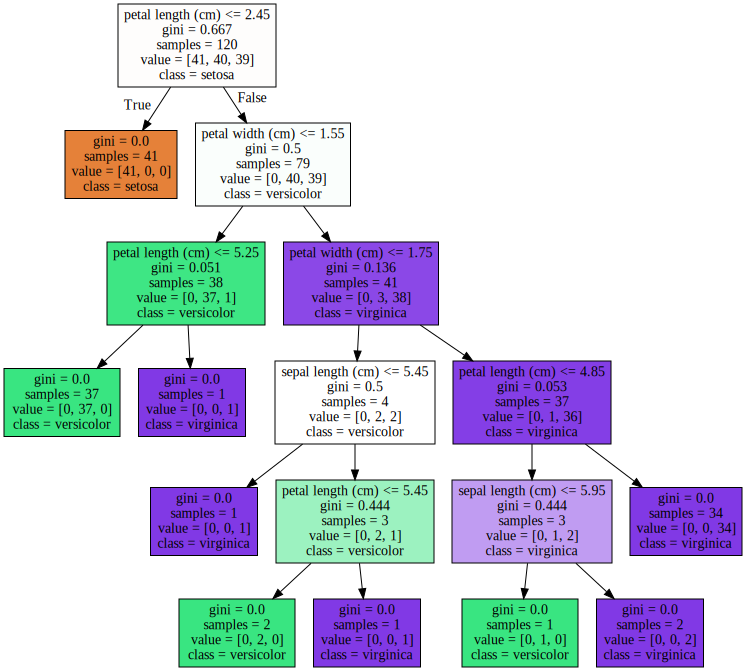

In [17]:
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file = 'tree.dot', class_names=iris_data.target_names,
               feature_names=iris_data.feature_names, impurity = True, filled = True)

import graphviz
with open('tree.dot') as f :
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

- petal length (cm) <= 2.45와 같은 조건은 자식 노드를 만들기 위한 규칙. 없으면, 리프 노드
- gini는 value = [] 로 주어진 데이터 분포에서의 지니계수
- samples는 현 규칙에 해당하는 데이터 건수
- value 합은 samples
- class = setosa 이고, 하위노드를 가질 경우에는 setosa가 제일 많다는 뜻
- 색깔이 짙어질수록 지니 계수가 낮고, 해당 레이블에ㅐ 속하는 샘플 데이터가 많다

In [19]:
print('accuracy : ', accuracy_score(y_test, dt.predict(X_test)))

accuracy :  0.9333333333333333


## max_depth = 3
- 더 간단해짐

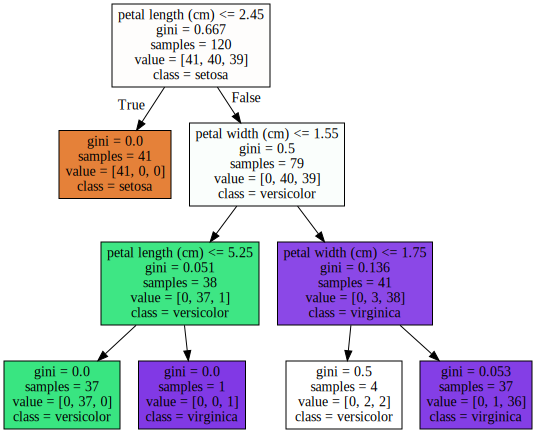

In [26]:
dt = DecisionTreeClassifier(max_depth=3, random_state = 156)
dt.fit(X_train, y_train)

export_graphviz(dt, out_file = 'tree.dot', class_names=iris_data.target_names,
               feature_names=iris_data.feature_names, impurity = True, filled = True)

import graphviz
with open('tree.dot') as f :
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [27]:
print('accuracy : ', accuracy_score(y_test, dt.predict(X_test)))

accuracy :  0.9333333333333333


## min_samples_split  =4
- 맨 아래 리프 노드 중 샘플이 3개이지만, 상이한 클래스가 있는 경우가 있다
- 상이한 값이 있어도 min_samples_split값보다 샘플 수가 작기 때문에 더 이상 분할하지 않음

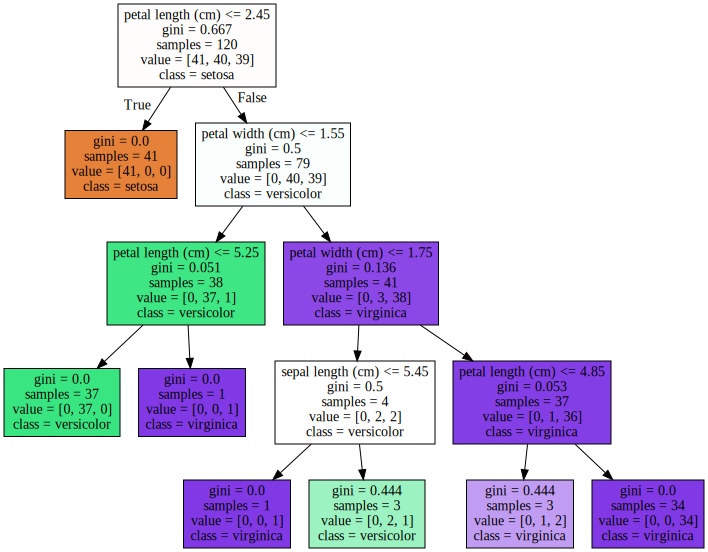

In [28]:
dt = DecisionTreeClassifier(min_samples_split=4, random_state = 156)
dt.fit(X_train, y_train)
export_graphviz(dt, out_file = 'tree.dot', class_names=iris_data.target_names,
               feature_names=iris_data.feature_names, impurity = True, filled = True)

import graphviz
with open('tree.dot') as f :
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [30]:
print('accuracy : ', accuracy_score(y_test, dt.predict(X_test)))

accuracy :  0.9333333333333333


## min_samples_leaf = 4
- 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값을 지정

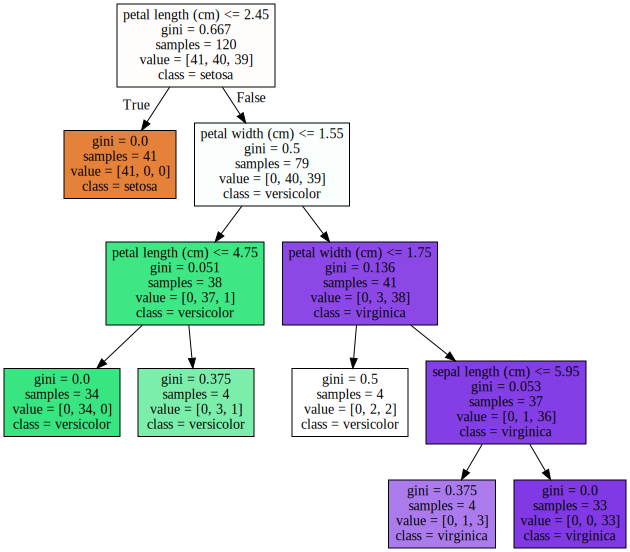

In [31]:
dt = DecisionTreeClassifier(min_samples_leaf=4, random_state = 156)
dt.fit(X_train, y_train)
export_graphviz(dt, out_file = 'tree.dot', class_names=iris_data.target_names,
               feature_names=iris_data.feature_names, impurity = True, filled = True)

import graphviz
with open('tree.dot') as f :
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [32]:
print('accuracy : ', accuracy_score(y_test, dt.predict(X_test)))

accuracy :  0.9333333333333333


## feature importance

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print('Feature Importance : ', np.round(dt.feature_importances_, 3))

Feature Importance :  [0.025 0.    0.555 0.42 ]


sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


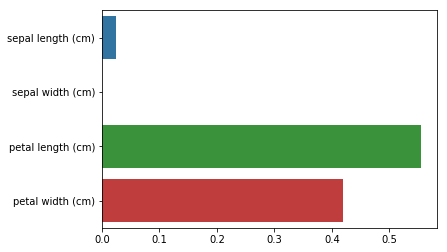

In [38]:
for name, value in zip(iris_data.feature_names, dt.feature_importances_) :
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(dt.feature_importances_, iris_data.feature_names)

# overfitting

In [40]:
#분류를 위한 테스트용 데이터를 쉽게 만들도록
from sklearn.datasets import make_classification

In [42]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

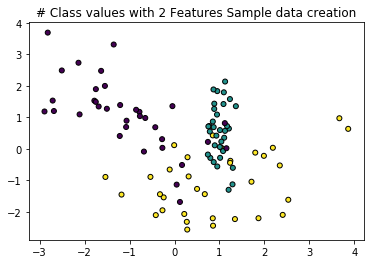

In [41]:
plt.title('# Class values with 2 Features Sample data creation')

#n_clusters_per_class : The number of clusters per class.
X_features, y_labels = make_classification(n_features = 2, n_redundant=0, n_informative=2,
                                          n_classes = 3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0], X_features[:,1], marker = 'o', c = y_labels, s = 25, edgecolors='k')

## default

C:\Users\wjssm\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


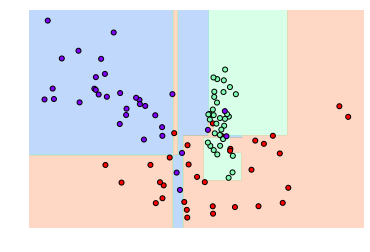

In [43]:
dt = DecisionTreeClassifier()
dt.fit(X_features, y_labels)
visualize_boundary(dt, X_features, y_labels)

- 분할이 자주 일어나서 결정 기준 경계가 매우 많다.
- 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 분할 기준으로 결정 기준 경계가 많아지고 복잡

## min_samples_leaf = 6

C:\Users\wjssm\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


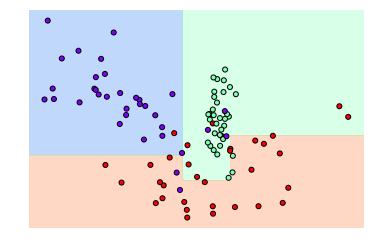

In [45]:
dt = DecisionTreeClassifier(min_samples_leaf=6)
dt.fit(X_features, y_labels)
visualize_boundary(dt, X_features, y_labels)

- 좀 더 일반화된 분류 규칙에 따라 분류됨.